# Lab Work: Developing and Comparing AI Models for Android Malware Detection

## Objective:
The goal of this lab is to develop and evaluate multiple AI models for detecting Android malware using the provided Android Malware Dataset. Students will choose at least three different machine learning or deep learning algorithms to compare their performance in classifying Android applications as benign or malicious.

## Dataset Overview:
The **Android Malware Dataset for Machine Learning** contains labeled Android APK samples, classified as benign (goodware) or malicious (e.g., adware, spyware, trojans). It includes various features extracted from the APKs, such as requested permissions, API calls, system behaviors, and more, which can be used to train machine learning models.

## Tasks:

1. **Data Preprocessing**:
   - Load the dataset and clean it by handling missing values and converting categorical features into numerical ones if necessary.
   - Split the data into training and testing sets.

2. **Model Development**:
   - Choose at least **three AI algorithms** of your choice (e.g., Logistic Regression, Random Forest, SVM, Neural Networks, XGBoost, etc.).
   - Train each model on the dataset and evaluate their performance using accuracy, precision, recall, F1-score, and confusion matrix.

3. **Model Comparison**:
   - Compare the models based on their performance metrics.
   - Analyze which model performs best and why.

4. **Optional (Hyperparameter Tuning)**:
   - Optionally, apply techniques like grid search to optimize the model’s hyperparameters.


## Resources:
- Kaggle Dataset: [Android Malware Dataset for Machine Learning](https://www.kaggle.com/datasets/shashwatwork/android-malware-dataset-for-machine-learning)

You need to login in Kaggle to get access to the dataset.


In [2]:
#
#
#
#
# Your code to develop AI model for malware classification.
# Hint: Use the example code provided in previous lab.
#
#
#
#

import pandas as pd
from sklearn.preprocessing import LabelEncoder
import pandas as pd  # Importing pandas for data handling
import numpy as np  # Importing numpy for numerical operations
import seaborn as sns  # Importing seaborn for visualization
import matplotlib.pyplot as plt  # Importing matplotlib for plotting graphs
from sklearn.model_selection import train_test_split  # Splitting dataset into train and test
from sklearn.preprocessing import StandardScaler, LabelEncoder  # Encoding categorical variables and scaling data
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier  # Importing classification models
from sklearn.svm import SVC  # Importing Support Vector Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Evaluation metrics
import tensorflow as tf  # TensorFlow for deep learning
from tensorflow import keras  # Keras API for building models
from tensorflow.keras.models import Sequential  # Sequential model type
from tensorflow.keras.layers import Dense, Dropout, LSTM  # Neural network layers


df = pd.read_csv("dataset-features-categories.xls")

df

2025-03-31 15:25:34.935881: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743431134.970399   22510 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743431134.980806   22510 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-31 15:25:35.015690: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


,transact,API call signature
0,onServiceConnected,API call signature
1,bindService,API call signature
2,attachInterface,API call signature
3,ServiceConnection,API call signature
4,android.os.Binder,API call signature
...,...,...
210,ACCESS_FINE_LOCATION,Manifest Permission
211,SET_WALLPAPER_HINTS,Manifest Permission
212,SET_PREFERRED_APPLICATIONS,Manifest Permission
213,WRITE_SECURE_SETTINGS,Manifest Permission


In [3]:
# Encoding categorical variables into numeric form
encoder = LabelEncoder()
categorical_columns = ['transact', 'API call signature']
for col in categorical_columns:
    df[col] = encoder.fit_transform(df[col])

**Lab Logbook requirement**: Provide a graph comparing the performance of the AI model that you have developed.

In [5]:
X = df.drop('API call signature', axis=1)
y = df['API call signature']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [6]:

# RandomForest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

# Gradient Boosting Classifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))
print(classification_report(y_test, y_pred_gb))

# Support Vector Machine (SVM)
svm = SVC(kernel='linear', probability=True)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Random Forest Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           3       1.00      1.00      1.00         4
           4       0.96      0.93      0.95        28

    accuracy                           0.93        43
   macro avg       0.93      0.95      0.94        43
weighted avg       0.93      0.93      0.93        43

Gradient Boosting Accuracy: 0.9302325581395349
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           3       1.00      1.00      1.00         4
           4       0.96      0.93      0.95        28

    accuracy                           0.93        43
   macro avg       0.93      0.95      0.94        43
weighted avg       0.93      0.93      0.93        43

SVM Accuracy: 0.6511627906976745
              precision    recall  f1-score   support

           0       0.30      0.27      0.29        11
      

/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

In [7]:

model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))


/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-03-31 15:25:40.575957: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.2318 - loss: 0.8568 - val_accuracy: 0.0000e+00 - val_loss: 0.5967
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1037 - loss: 0.6012 - val_accuracy: 0.0000e+00 - val_loss: 0.3369
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0232 - loss: 0.4101 - val_accuracy: 0.0000e+00 - val_loss: 0.0896
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0481 - loss: 0.1516 - val_accuracy: 0.0000e+00 - val_loss: -0.1753
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.0077 - loss: -0.0959 - val_accuracy: 0.0000e+00 - val_loss: -0.4512
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.0077 - loss: -0.1788 - val_accuracy: 0.0000e+00 - val_loss: -0.7404
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.0124 - loss: -0.4941 - val_accuracy: 0.0000e+00 - val_loss: -1.0560
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0026 - loss: -0.7612 - val_

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Neural Network Accuracy: 0.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      11.0
           1       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       4.0
           4       0.00      0.00      0.00      28.0

    accuracy                           0.00      43.0
   macro avg       0.00      0.00      0.00      43.0
weighted avg       0.00      0.00      0.00      43.0



/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

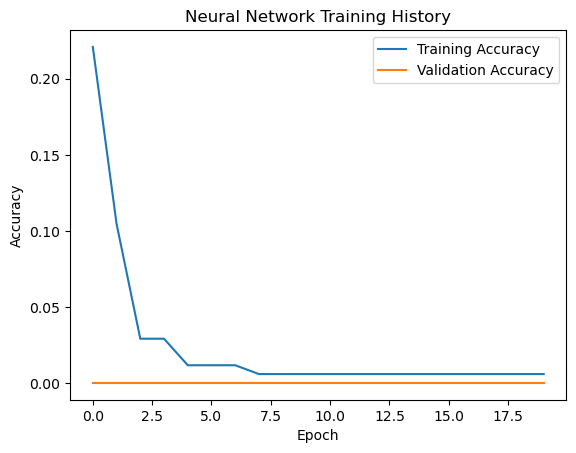

In [8]:
y_pred_nn = (model.predict(X_test) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training History')
plt.show()

In [9]:
X_train_reshaped = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_reshaped = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

model_lstm = Sequential([
    LSTM(4, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])),
    Dense(1)
])

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_lstm.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))

Epoch 1/20


/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.3417 - loss: 21.9273 - val_accuracy: 0.2558 - val_loss: 31.9479
Epoch 2/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3845 - loss: 21.3772 - val_accuracy: 0.2558 - val_loss: 30.7911
Epoch 3/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3827 - loss: 21.5428 - val_accuracy: 0.2558 - val_loss: 30.5424
Epoch 4/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3591 - loss: 22.9574 - val_accuracy: 0.2558 - val_loss: 30.3761
Epoch 5/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3535 - loss: 23.2932 - val_accuracy: 0.2558 - val_loss: 30.2167
Epoch 6/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3750 - loss: 21.0102 - val_accuracy: 0.2558 - val_loss: 29.2751
Epoch 7/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3457 - loss: 23.5193 - val_accuracy: 0.2558 - val_loss: 29.0571
Epoch 8/20
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3429 - loss: 23.1726 - val_accuracy: 0.2558 - val_loss: 28

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step
Neural Network Accuracy: 0.2558139534883721
              precision    recall  f1-score   support

           0       0.26      1.00      0.41        11
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        28

    accuracy                           0.26        43
   macro avg       0.09      0.33      0.14        43
weighted avg       0.07      0.26      0.10        43



/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

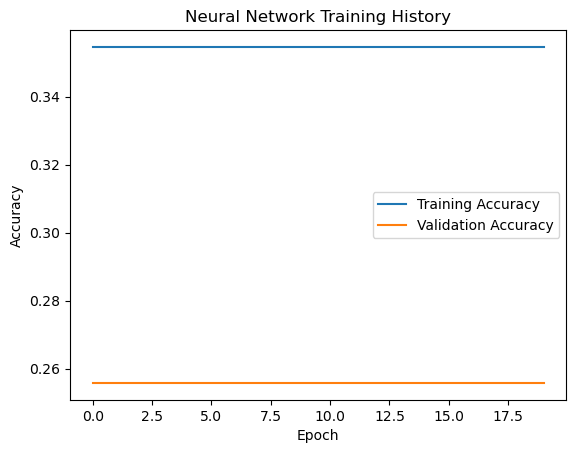

In [10]:
y_pred_lstm = (model_lstm.predict(X_test_reshaped) > 0.5).astype("int32")
print("Neural Network Accuracy:", accuracy_score(y_test, y_pred_lstm))
print(classification_report(y_test, y_pred_lstm))

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Neural Network Training History')
plt.show()

In [17]:
ai_models = ['rf', 'gb', 'svm', 'nn', 'lstm']
model_prediction = [y_pred_rf, y_pred_gb, y_pred_svm, y_pred_nn, y_pred_lstm]

In [19]:
model_prediction = [np.round(pred) for pred in model_prediction]

In [26]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

num_samples = y_test.shape[0]

model_prediction = [pred[-num_samples:].reshape(-1) for pred in model_prediction]

accuracy_imb = []
precision_imb = []
recall_imb =[]
f1_imb = []
auc_imb = []

for x in range(len(model_prediction)):
    acc_score = np.round(accuracy_score(y_test.values, model_prediction[x]) * 100, 2)
    accuracy_imb.append(acc_score)
    pre_score = np.round(precision_score(y_test.values, model_prediction[x], average='weighted') * 100, 2)
    precision_imb.append(pre_score)
    rc_score = np.round(recall_score(y_test.values, model_prediction[x], average='weighted') * 100, 2)
    recall_imb.append(rc_score)
    f_score = np.round(f1_score(y_test.values, model_prediction[x], average='weighted') * 100, 2)
    f1_imb.append(f_score)
    #auc_sc = np.round(roc_auc_score(y_test.values, model_prediction[x], multi_class='ovr', average='weighted') * 100, 2)
    #auc_imb.append(auc_sc)

/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/shroudedsublet/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result

In [34]:
print('Type of prediction_imb', type(model_prediction))
print('Type of each element in prediction_imb', type(model_prediction[0]))
model_perform_imb  = {'AI Models':ai_models,
              'Accuracy':accuracy_imb,
               'Precision':precision_imb,
               'Recall':recall_imb,
               'F1-Score':f1_imb,
               #'AUC':auc_imb
              }
model_data_imb  = pd.DataFrame(model_perform_imb)
print('Result of testing with an Imbalanced Dataset')
model_data_imb

Type of prediction_imb <class 'list'>
Type of each element in prediction_imb <class 'numpy.ndarray'>
Result of testing with an Imbalanced Dataset


,AI Models,Accuracy,Precision,Recall,F1-Score
0,rf,93.02,93.32,93.02,93.11
1,gb,93.02,93.32,93.02,93.11
2,svm,65.12,57.00,65.12,60.68
3,nn,0.00,0.00,0.00,0.00
4,lstm,25.58,6.54,25.58,10.42


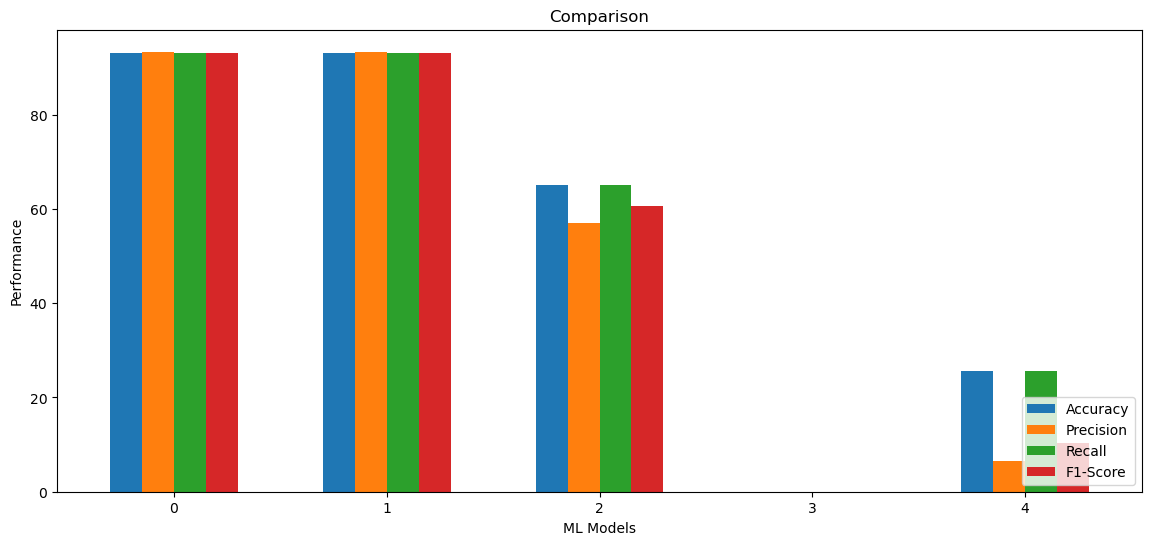

In [38]:
model_imb = model_data_imb.set_index('AI Models')

model_data_imb.plot(kind='bar', figsize=(14,6), width=0.6)
plt.title('Comparison')
plt.ylabel('Performance')
plt.xlabel('ML Models')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.show()